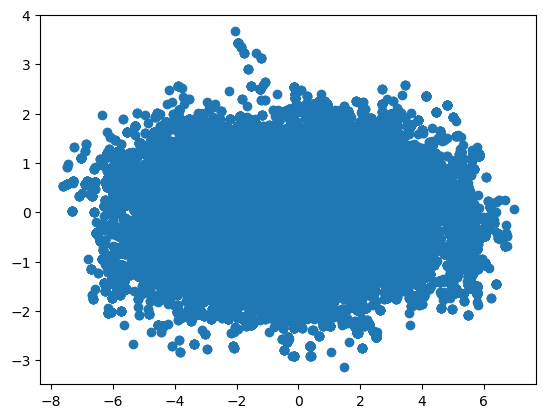

In [8]:
import GMH
import numpy as np
import matplotlib.pyplot as plt

q = GMH.GaussianKernel(lambda x:x, lambda x:np.eye(x.shape[0]))
Sigma = np.eye(2)
Sigma[0, 0] = 10.0
pi = GMH.Gaussian_distrib(np.zeros(2), Sigma)

sample = np.array(GMH.Generalized_Metropolis_Hastings(pi, q, np.zeros(2), 10000, 10))
plt.plot(sample[:,0], sample[:,1], "o")
plt.show()